In [5]:
pip install scikit-learn-extra


   ---------------------------------------- 0.0/343.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/343.0 kB ? eta -:--:--
   ------ -------------------------------- 61.4/343.0 kB 656.4 kB/s eta 0:00:01
   ---------- ---------------------------- 92.2/343.0 kB 744.7 kB/s eta 0:00:01
   -------------------------------- ------- 276.5/343.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 343.0/343.0 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


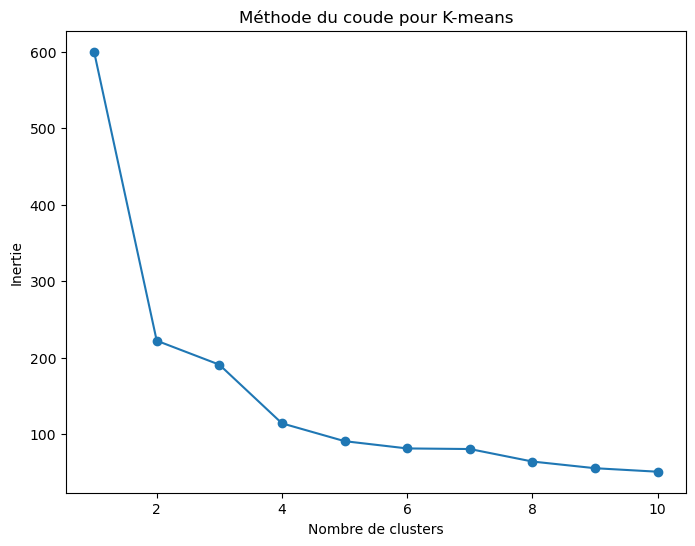

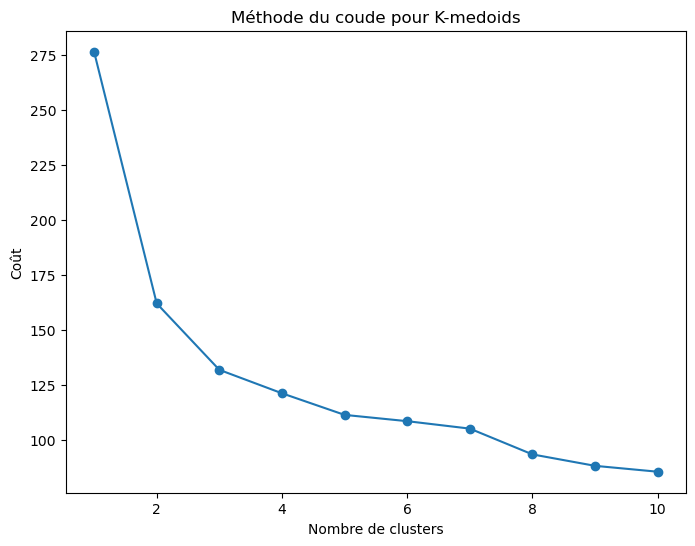

Meilleur epsilon pour DBSCAN: 1.4


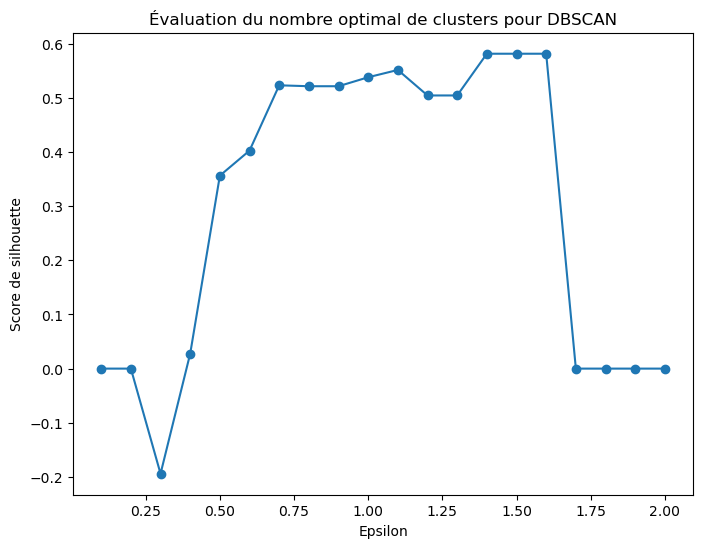

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement de l'ensemble de données Iris
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Fonction pour afficher le coude (elbow) pour K-means
def plot_kmeans_elbow(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Méthode du coude pour K-means')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.show()

# Fonction pour afficher le coude (elbow) pour K-medoids
def plot_kmedoids_elbow(data, max_clusters=10):
    costs = []
    for k in range(1, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=k, random_state=42)
        kmedoids.fit(data)
        costs.append(kmedoids.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), costs, marker='o')
    plt.title('Méthode du coude pour K-medoids')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Coût')
    plt.show()

# Fonction pour évaluer le nombre optimal de clusters pour DBSCAN avec silhouette_score
def evaluate_dbscan(data):
    silhouette_scores = []
    eps_range = np.linspace(0.1, 2.0, 20)
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps)
        labels = dbscan.fit_predict(data)
        if len(set(labels)) > 1:
            silhouette_scores.append(silhouette_score(data, labels))
        else:
            silhouette_scores.append(0)

    best_eps = eps_range[np.argmax(silhouette_scores)]
    print(f"Meilleur epsilon pour DBSCAN: {best_eps}")

    plt.figure(figsize=(8, 6))
    plt.plot(eps_range, silhouette_scores, marker='o')
    plt.title('Évaluation du nombre optimal de clusters pour DBSCAN')
    plt.xlabel('Epsilon')
    plt.ylabel('Score de silhouette')
    plt.show()

# Affichage du coude pour K-means
plot_kmeans_elbow(scaled_data)

# Affichage du coude pour K-medoids
plot_kmedoids_elbow(scaled_data)

# Évaluation du nombre optimal de clusters pour DBSCAN
evaluate_dbscan(scaled_data)


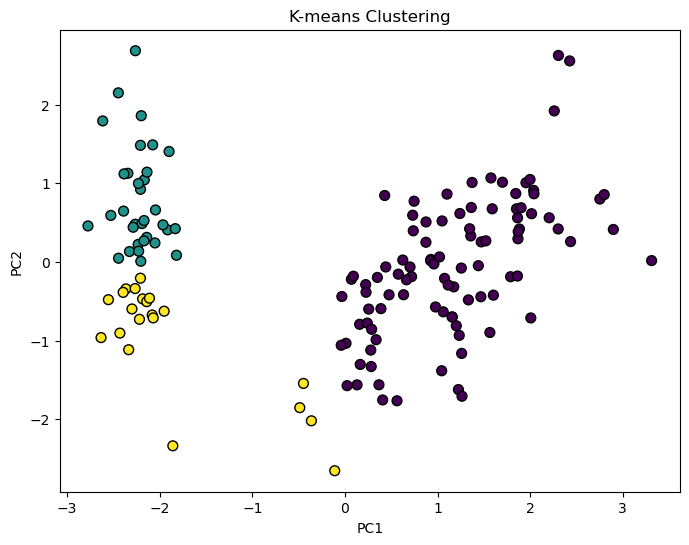

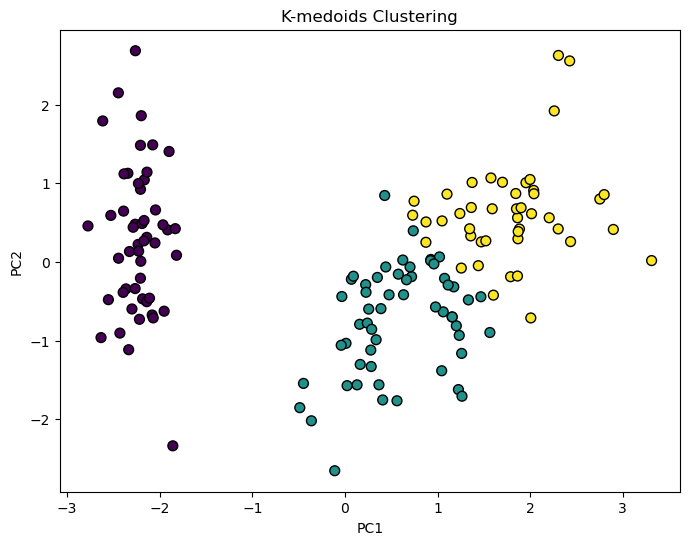

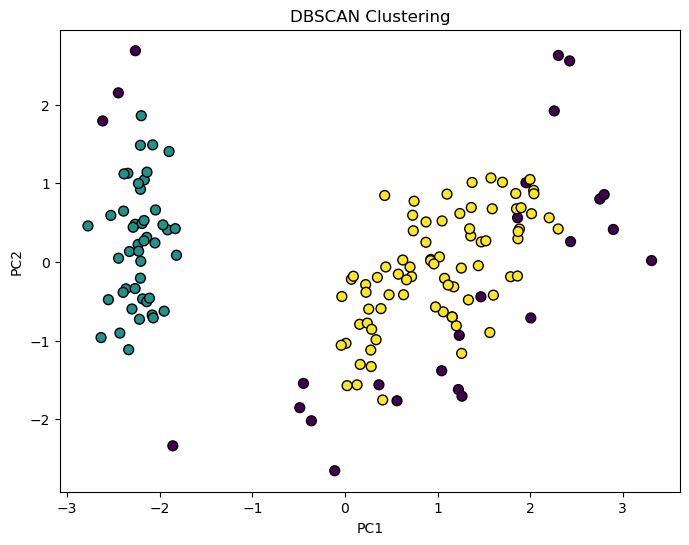

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement de l'ensemble de données Iris
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Fonction pour afficher les clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
plot_clusters(data_pca, kmeans_labels, 'K-means Clustering')

# K-medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(scaled_data)
plot_clusters(data_pca, kmedoids_labels, 'K-medoids Clustering')

# DBSCAN
dbscan = DBSCAN(eps=0.6)
dbscan_labels = dbscan.fit_predict(scaled_data)
plot_clusters(data_pca, dbscan_labels, 'DBSCAN Clustering')


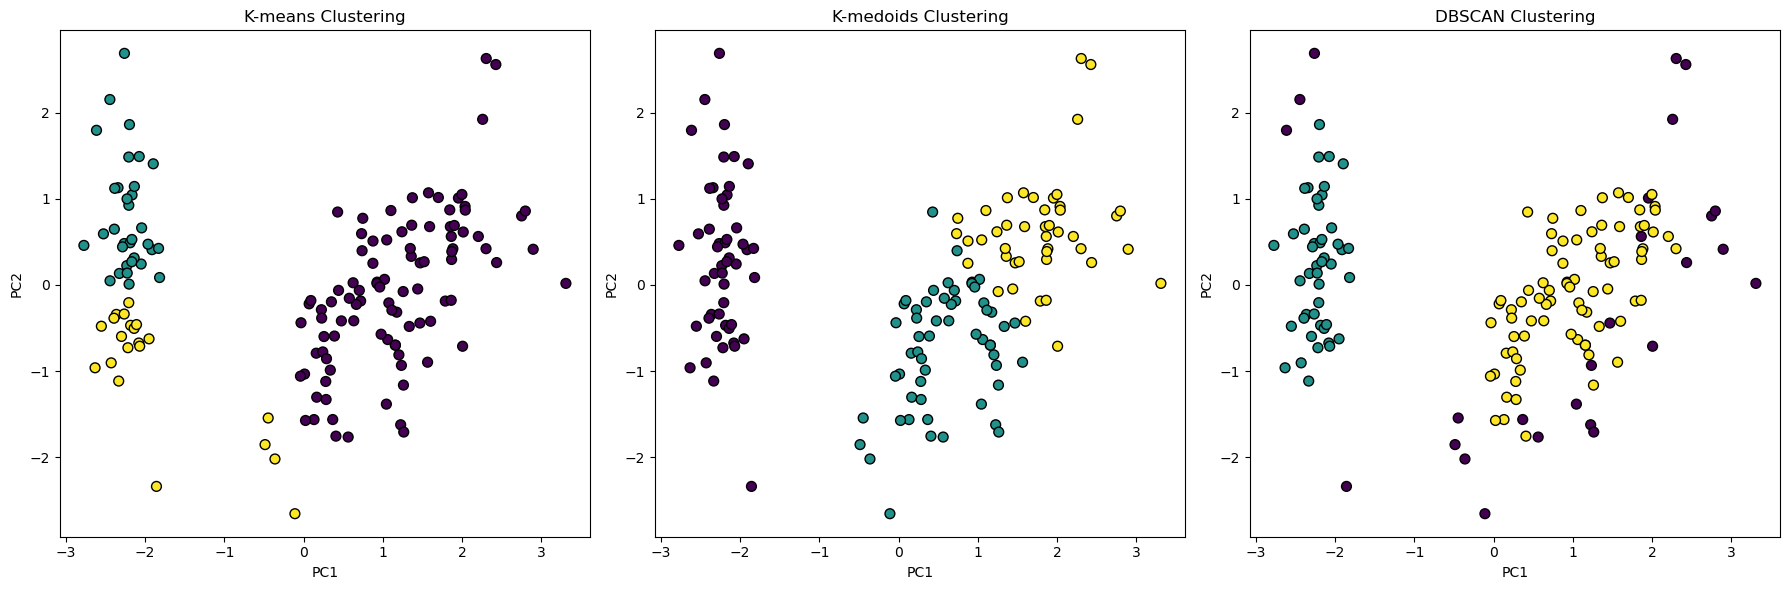

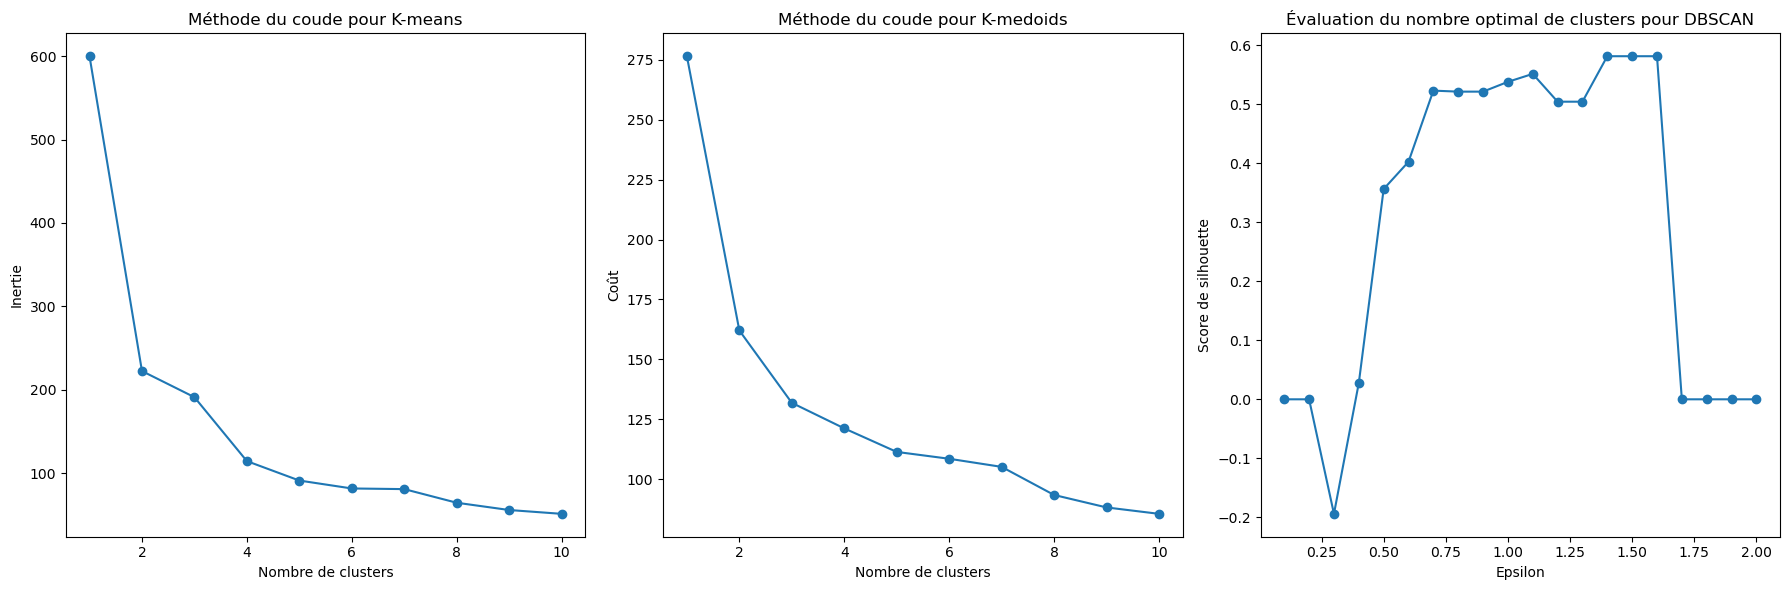

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement de l'ensemble de données Iris
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Fonction pour afficher les clusters
def plot_clusters(ax, data, labels, title):
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

# Création de sous-graphiques pour les clusters
fig, axes_clusters = plt.subplots(1, 3, figsize=(18, 6))

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
plot_clusters(axes_clusters[0], data_pca, kmeans_labels, 'K-means Clustering')

# K-medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(scaled_data)
plot_clusters(axes_clusters[1], data_pca, kmedoids_labels, 'K-medoids Clustering')

# DBSCAN
dbscan = DBSCAN(eps=0.6)
dbscan_labels = dbscan.fit_predict(scaled_data)
plot_clusters(axes_clusters[2], data_pca, dbscan_labels, 'DBSCAN Clustering')

# Ajustement de la disposition des graphiques
plt.tight_layout()

# Fonction pour afficher le coude (elbow)
def plot_elbow(ax, data, algorithm, max_clusters=10):
    if algorithm == 'KMeans':
        inertias = []
        for k in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(data)
            inertias.append(kmeans.inertia_)
        ax.plot(range(1, max_clusters + 1), inertias, marker='o')
        ax.set_title('Méthode du coude pour K-means')
        ax.set_xlabel('Nombre de clusters')
        ax.set_ylabel('Inertie')
    elif algorithm == 'KMedoids':
        costs = []
        for k in range(1, max_clusters + 1):
            kmedoids = KMedoids(n_clusters=k, random_state=42)
            kmedoids.fit(data)
            costs.append(kmedoids.inertia_)
        ax.plot(range(1, max_clusters + 1), costs, marker='o')
        ax.set_title('Méthode du coude pour K-medoids')
        ax.set_xlabel('Nombre de clusters')
        ax.set_ylabel('Coût')
    elif algorithm == 'DBSCAN':
        silhouette_scores = []
        eps_range = np.linspace(0.1, 2.0, 20)
        for eps in eps_range:
            dbscan = DBSCAN(eps=eps)
            labels = dbscan.fit_predict(data)
            if len(set(labels)) > 1:
                silhouette_scores.append(silhouette_score(data, labels))
            else:
                silhouette_scores.append(0)
        best_eps = eps_range[np.argmax(silhouette_scores)]
        ax.plot(eps_range, silhouette_scores, marker='o')
        ax.set_title('Évaluation du nombre optimal de clusters pour DBSCAN')
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Score de silhouette')

# Création de sous-graphiques pour les graphiques de coude
fig, axes_elbow = plt.subplots(1, 3, figsize=(18, 6))

# K-means Elbow
plot_elbow(axes_elbow[0], scaled_data, 'KMeans')

# K-medoids Elbow
plot_elbow(axes_elbow[1], scaled_data, 'KMedoids')

# DBSCAN Silhouette Score
plot_elbow(axes_elbow[2], scaled_data, 'DBSCAN')

# Ajustement de la disposition des graphiques de coude
plt.tight_layout()

# Affichage des graphiques
plt.show()


In [ ]:
pip install --upgrade pandas

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Charger l'ensemble de données Iris
iris = datasets.load_iris()
X = iris.data

# Définir le vrai label pour l'évaluation
true_labels = iris.target

# Définir une fonction pour évaluer les métriques et renvoyer les résultats sous forme de DataFrame
def evaluate_clustering(X, algorithm, true_labels):
    algorithm.fit(X)
    labels = algorithm.labels_
    
    if hasattr(algorithm, 'inertia_') and isinstance(algorithm, KMeans):
        inertia = algorithm.inertia_
    else:
        inertia = np.nan
    
    # Silhouette Score
    silhouette = silhouette_score(X, labels)
    
    # Indice Davies-Bouldin
    davies_bouldin = davies_bouldin_score(X, labels)
    
    if isinstance(algorithm, KMeans):
        # Trouver le meilleur nombre de clusters pour KMeans
        best_n_clusters = None
        best_silhouette = -1
        for n_clusters in range(2, 6):
            kmeans_temp = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans_temp.fit(X)
            labels_temp = kmeans_temp.labels_
            silhouette_temp = silhouette_score(X, labels_temp)
            if silhouette_temp > best_silhouette:
                best_silhouette = silhouette_temp
                best_n_clusters = n_clusters
        
        return pd.DataFrame({
            'Algorithme': ['KMeans'],
            'Inertie': [inertia],
            'Silhouette Score': [silhouette],
            'Davies-Bouldin Index': [davies_bouldin],
            'Nombre de clusters': [best_n_clusters]
        })
    elif isinstance(algorithm, KMedoids):
        # Trouver le meilleur nombre de clusters pour KMedoids
        best_n_clusters = None
        best_silhouette = -1
        for n_clusters in range(2, 6):
            kmedoids_temp = KMedoids(n_clusters=n_clusters, random_state=42)
            kmedoids_temp.fit(X)
            labels_temp = kmedoids_temp.labels_
            silhouette_temp = silhouette_score(X, labels_temp)
            if silhouette_temp > best_silhouette:
                best_silhouette = silhouette_temp
                best_n_clusters = n_clusters
        
        return pd.DataFrame({
            'Algorithme': ['KMedoids'],
            'Silhouette Score': [silhouette],
            'Davies-Bouldin Index': [davies_bouldin],
            'Nombre de clusters': [best_n_clusters]
        })
    elif isinstance(algorithm, DBSCAN):
        # Nombre de clusters obtenus (ignoré si -1, qui est le label pour les points considérés comme bruit)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        return pd.DataFrame({
            'Algorithme': ['DBSCAN'],
            'Nombre de clusters': [n_clusters],
            'Silhouette Score': [silhouette],
            'Davies-Bouldin Index': [davies_bouldin]
        })

# Comparaison des algorithmes
kmeans = KMeans(n_clusters=3, random_state=42)
kmedoids = KMedoids(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)

results = pd.DataFrame()

# KMeans
results = pd.concat([results, evaluate_clustering(X, kmeans, true_labels)], ignore_index=True)

# KMedoids
results = pd.concat([results, evaluate_clustering(X, kmedoids, true_labels)], ignore_index=True)

# DBSCAN
results = pd.concat([results, evaluate_clustering(X, dbscan, true_labels)], ignore_index=True)

# Afficher le tableau complet des métriques
print("Tableau complet des métriques :")
print(results)

# Afficher les meilleures métriques
print("\nMeilleures métriques par algorithme :")
best_metrics = results.loc[results.groupby('Algorithme')['Silhouette Score'].idxmax()]
print(best_metrics)


Tableau complet des métriques :
  Algorithme    Inertie  Silhouette Score  Davies-Bouldin Index  \
0     KMeans  78.855666          0.551192              0.666039   
1   KMedoids        NaN          0.520198              0.668624   
2     DBSCAN        NaN          0.486034              7.222448   

   Nombre de clusters  
0                   2  
1                   2  
2                   2  

Meilleures métriques par algorithme :
  Algorithme    Inertie  Silhouette Score  Davies-Bouldin Index  \
2     DBSCAN        NaN          0.486034              7.222448   
0     KMeans  78.855666          0.551192              0.666039   
1   KMedoids        NaN          0.520198              0.668624   

   Nombre de clusters  
2                   2  
0                   2  
1                   2  
